In [1]:
import pypsa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from glob import glob
from tqdm import tqdm
import seaborn as sb
from pathlib import Path

In [2]:
n = pypsa.Network("../results/advanced_nuclear_v1.0/networks/illinois_solved.nc")

c:\Users\sdotson\AppData\Local\miniforge3\envs\pypsa-illinois-test05\Lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning:

Engine 'rasterio' loading failed:
DLL load failed while importing _version: The specified procedure could not be found.

INFO:pypsa.io:Imported network illinois_solved.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units


## Test a range of capital cost overruns for advanced nuclear reactors.

In [3]:
delta = 0.25
costs = np.arange(1.25, 3+delta, delta)

In [4]:
smr_cost_2030 = n.generators.loc[n.generators.index.str.contains('SMR'), 'capital_cost'].unique()[0]

In [5]:
results_path = Path("../results/advanced_nuclear_sensitivity/")
results_path.mkdir(parents=True, exist_ok=True)

# results = [n]
for cost in tqdm(costs):
    n_test = n.copy()
    n_test.generators.loc[n_test.generators.index.str.contains('SMR'), 'capital_cost'] = smr_cost_2030*cost
    
    n_test.optimize(solver_name='cplex', multi_investment_periods=True)
    
    scenario = f"cost-2023_growth_0.01_demand-1.85E+08_atb-Moderate-X-{cost}_v1.0"
    
    network_folder = results_path/scenario
    network_folder.mkdir(exist_ok=True)
    
    # results.append(n_test)
    n_test.export_to_netcdf(str(network_folder/"illinois_solved.nc"))

  0%|          | 0/8 [00:00<?, ?it/s]WARNING:pypsa.consistency:The following buses have carriers which are not defined:
Index(['MISO-Z4', 'ComEd'], dtype='object', name='Bus')
Index(['0'], dtype='object', name='Line')
Index(['MISO-Z4', 'ComEd'], dtype='object', name='Bus')
Index(['0'], dtype='object', name='Line')
INFO:linopy.model: Solve problem using Cplex solver
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:03<00:00,  2.20it/s]
INFO:linopy.io: Writing time: 45.04s


Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Parallel mode: deterministic, using up to 12 threads for concurrent optimization:
 * Starting dual Simplex on 1 thread...
 * Starting Barrier on 10 threads...
 * Starting primal Simplex on 1 thread...
Tried aggregator 1 time.
LP Presolve eliminated 8418758 rows and 1765649 columns.
Aggregator did 43825 substitutions.
Reduced LP has 2391066 rows, 1449287 columns, and 6975925 nonzeros.
Presolve time = 22.91 sec. (6212.36 ticks)
Symmetry aggregator did 1261392 additional substitutions.
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =   11691548788.867838
Perturbation started.
Iteration:   101   Dual objective     =   11691548788.873865
Iteration:  2351   Dual objective     =   11856048701.309349
Iteration:  3933   Dual objective     =   12023626769.856998
Iteration:  6260   Dual objective     =   12158167556.600834
Iteration:  8334   Dual

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3258761 primals, 10853649 duals
Objective: 2.97e+11
Solver model: available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Generator-ext-p-ramp_limit_up, Generator-ext-p-ramp_limit_down, Line-ext-s-lower, Line-ext-s-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the netw

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Parallel mode: deterministic, using up to 12 threads for concurrent optimization:
 * Starting dual Simplex on 1 thread...
 * Starting Barrier on 10 threads...
 * Starting primal Simplex on 1 thread...
Tried aggregator 1 time.
LP Presolve eliminated 8418758 rows and 1765649 columns.
Aggregator did 43825 substitutions.
Reduced LP has 2391066 rows, 1449287 columns, and 6975925 nonzeros.
Presolve time = 21.92 sec. (6212.36 ticks)
Symmetry aggregator did 1261392 additional substitutions.
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =   11691548788.867838
Perturbation started.
Iteration:   101   Dual objective     =   11691548788.873865
Iteration:  2351   Dual objective     =   11856048701.309349
Iteration:  3933   Dual objective     =   12023626769.856998
Iteration:  6260   Dual objective     =   12158167556.600834
Iteration:  8334   Dual

Markowitz threshold set to 0.1


Iteration: 410571   Dual objective     =  237184190139.351685
Removing perturbation.

Barrier solved model.



INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3258761 primals, 10853649 duals
Objective: 3.18e+11
Solver model: available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Generator-ext-p-ramp_limit_up, Generator-ext-p-ramp_limit_down, Line-ext-s-lower, Line-ext-s-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the netw

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Parallel mode: deterministic, using up to 12 threads for concurrent optimization:
 * Starting dual Simplex on 1 thread...
 * Starting Barrier on 10 threads...
 * Starting primal Simplex on 1 thread...
Tried aggregator 1 time.
LP Presolve eliminated 8418758 rows and 1765649 columns.
Aggregator did 43825 substitutions.
Reduced LP has 2391066 rows, 1449287 columns, and 6975925 nonzeros.
Presolve time = 17.88 sec. (6212.36 ticks)
Symmetry aggregator did 1261392 additional substitutions.
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =   11691548788.867838
Perturbation started.
Iteration:   101   Dual objective     =   11691548788.873865
Iteration:  2351   Dual objective     =   11856048701.309349
Iteration:  3933   Dual objective     =   12023626769.856998
Iteration:  6260   Dual objective     =   12158167556.600834
Iteration:  8334   Dual

Markowitz threshold set to 0.1


Iteration: 383309   Dual objective     =  266375852035.428406
Iteration: 389823   Dual objective     =  266433596371.944824
Iteration: 391342   Dual objective     =  266765997512.683380
Elapsed time = 352.30 sec. (190729.90 ticks, 391376 iterations)
Iteration: 393517   Dual objective     =  266887601533.455627
Elapsed time = 374.67 sec. (200751.24 ticks, 395860 iterations)
Iteration: 396196   Dual objective     =  267052513704.988403
Iteration: 399172   Dual objective     =  267141060156.954437
Elapsed time = 399.28 sec. (210752.15 ticks, 399961 iterations)
Iteration: 401259   Dual objective     =  267280169430.795410
Elapsed time = 425.31 sec. (220769.59 ticks, 403012 iterations)
Iteration: 403116   Dual objective     =  267352178761.008240
Iteration: 405152   Dual objective     =  267509169479.948425
Elapsed time = 450.31 sec. (230779.66 ticks, 406494 iterations)
Iteration: 406923   Dual objective     =  267609157463.147827
Iteration: 408850   Dual objective     =  269111105988.38082

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3258761 primals, 10853649 duals
Objective: 3.26e+11
Solver model: available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Generator-ext-p-ramp_limit_up, Generator-ext-p-ramp_limit_down, Line-ext-s-lower, Line-ext-s-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the netw

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Parallel mode: deterministic, using up to 12 threads for concurrent optimization:
 * Starting dual Simplex on 1 thread...
 * Starting Barrier on 10 threads...
 * Starting primal Simplex on 1 thread...
Tried aggregator 1 time.
LP Presolve eliminated 8418758 rows and 1765649 columns.
Aggregator did 43825 substitutions.
Reduced LP has 2391066 rows, 1449287 columns, and 6975925 nonzeros.
Presolve time = 21.14 sec. (6212.36 ticks)
Symmetry aggregator did 1261392 additional substitutions.
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =   11691548788.867838
Perturbation started.
Iteration:   101   Dual objective     =   11691548788.873865
Iteration:  2351   Dual objective     =   11856048701.309349
Iteration:  3933   Dual objective     =   12023626769.856998
Iteration:  6260   Dual objective     =   12158167556.600834
Iteration:  8334   Dual

Markowitz threshold set to 0.1


Iteration: 377466   Dual objective     =  263109474364.999146
Iteration: 381116   Dual objective     =  264009972204.514374
Elapsed time = 435.53 sec. (220723.66 ticks, 385215 iterations)
Iteration: 385893   Dual objective     =  264277416272.505920
Iteration: 390133   Dual objective     =  264517366293.346100
Iteration: 394149   Dual objective     =  264582620089.075562
Elapsed time = 459.11 sec. (230730.55 ticks, 396296 iterations)
Iteration: 398451   Dual objective     =  264836878714.614105
Iteration: 400526   Dual objective     =  265028842054.969482
Elapsed time = 483.78 sec. (240731.07 ticks, 401683 iterations)
Iteration: 402522   Dual objective     =  266057540233.168854
Iteration: 404966   Dual objective     =  268493756307.658966
Elapsed time = 509.38 sec. (250732.55 ticks, 405737 iterations)
Iteration: 407003   Dual objective     =  269106733065.118652
Iteration: 409957   Dual objective     =  269754621419.287750
Iteration: 412563   Dual objective     =  270139487163.990784


INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3258761 primals, 10853649 duals
Objective: 3.32e+11
Solver model: available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Generator-ext-p-ramp_limit_up, Generator-ext-p-ramp_limit_down, Line-ext-s-lower, Line-ext-s-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the netw

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Parallel mode: deterministic, using up to 12 threads for concurrent optimization:
 * Starting dual Simplex on 1 thread...
 * Starting Barrier on 10 threads...
 * Starting primal Simplex on 1 thread...
Tried aggregator 1 time.
LP Presolve eliminated 8418758 rows and 1765649 columns.
Aggregator did 43825 substitutions.
Reduced LP has 2391066 rows, 1449287 columns, and 6975925 nonzeros.
Presolve time = 20.73 sec. (6212.36 ticks)
Symmetry aggregator did 1261392 additional substitutions.
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =   11691548788.867838
Perturbation started.
Iteration:   101   Dual objective     =   11691548788.873865
Iteration:  2351   Dual objective     =   11856048701.309349
Iteration:  3933   Dual objective     =   12023626769.856998
Iteration:  6260   Dual objective     =   12158167556.600834
Iteration:  8334   Dual

Markowitz threshold set to 0.1


Iteration: 360808   Dual objective     =  272227945114.030060
Elapsed time = 270.59 sec. (160675.06 ticks, 361636 iterations)
Iteration: 365216   Dual objective     =  272739670617.623474
Iteration: 368101   Dual objective     =  272969885623.494202
Elapsed time = 295.61 sec. (170675.27 ticks, 368683 iterations)
Iteration: 372918   Dual objective     =  273094109081.685547
Iteration: 375171   Dual objective     =  273245574472.722534
Iteration: 377546   Dual objective     =  274704138024.232117
Elapsed time = 317.50 sec. (180676.31 ticks, 379211 iterations)
Iteration: 379887   Dual objective     =  276825422689.649353
Iteration: 382167   Dual objective     =  277424905457.380920
Elapsed time = 341.61 sec. (190676.82 ticks, 384234 iterations)
Iteration: 384444   Dual objective     =  277535442517.758240
Iteration: 385984   Dual objective     =  278151549009.540833
Iteration: 388470   Dual objective     =  279537127873.596436
Elapsed time = 373.75 sec. (200691.27 ticks, 388952 iterations

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3258761 primals, 10853649 duals
Objective: 3.37e+11
Solver model: available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Generator-ext-p-ramp_limit_up, Generator-ext-p-ramp_limit_down, Line-ext-s-lower, Line-ext-s-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the netw

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Parallel mode: deterministic, using up to 12 threads for concurrent optimization:
 * Starting dual Simplex on 1 thread...
 * Starting Barrier on 10 threads...
 * Starting primal Simplex on 1 thread...
Tried aggregator 1 time.
LP Presolve eliminated 8418758 rows and 1765649 columns.
Aggregator did 43825 substitutions.
Reduced LP has 2391066 rows, 1449287 columns, and 6975925 nonzeros.
Presolve time = 20.27 sec. (6212.36 ticks)
Symmetry aggregator did 1261392 additional substitutions.
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =   11691548788.867838
Perturbation started.
Iteration:   101   Dual objective     =   11691548788.873865
Iteration:  2351   Dual objective     =   11856048701.309349
Iteration:  3933   Dual objective     =   12023626769.856998
Iteration:  6260   Dual objective     =   12158167556.600834
Iteration:  8334   Dual

Markowitz threshold set to 0.1


Iteration: 360808   Dual objective     =  272227945114.030060
Elapsed time = 273.00 sec. (160675.06 ticks, 361636 iterations)
Iteration: 365216   Dual objective     =  272739670617.623474
Iteration: 368101   Dual objective     =  272969885623.494202
Elapsed time = 297.72 sec. (170675.27 ticks, 368683 iterations)
Iteration: 372918   Dual objective     =  273094109081.685547
Iteration: 375171   Dual objective     =  273245574472.722534
Iteration: 377546   Dual objective     =  274704138024.232117
Elapsed time = 319.30 sec. (180676.31 ticks, 379211 iterations)
Iteration: 379887   Dual objective     =  276825422689.649353
Iteration: 382167   Dual objective     =  277424905457.380920
Elapsed time = 343.67 sec. (190676.82 ticks, 384234 iterations)
Iteration: 384444   Dual objective     =  277535442517.758240
Iteration: 385984   Dual objective     =  278151549009.540833
Iteration: 388470   Dual objective     =  279537127873.596436
Elapsed time = 367.83 sec. (200691.27 ticks, 388952 iterations

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3258761 primals, 10853649 duals
Objective: 3.39e+11
Solver model: available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Generator-ext-p-ramp_limit_up, Generator-ext-p-ramp_limit_down, Line-ext-s-lower, Line-ext-s-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the netw

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Parallel mode: deterministic, using up to 12 threads for concurrent optimization:
 * Starting dual Simplex on 1 thread...
 * Starting Barrier on 10 threads...
 * Starting primal Simplex on 1 thread...
Tried aggregator 1 time.
LP Presolve eliminated 8418758 rows and 1765649 columns.
Aggregator did 43825 substitutions.
Reduced LP has 2391066 rows, 1449287 columns, and 6975925 nonzeros.
Presolve time = 20.23 sec. (6212.36 ticks)
Symmetry aggregator did 1261392 additional substitutions.
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =   11691548788.867838
Perturbation started.
Iteration:   101   Dual objective     =   11691548788.873865
Iteration:  2351   Dual objective     =   11856048701.309349
Iteration:  3933   Dual objective     =   12023626769.856998
Iteration:  6260   Dual objective     =   12158167556.600834
Iteration:  8334   Dual

Markowitz threshold set to 0.1


Iteration: 360808   Dual objective     =  272227945114.030060
Elapsed time = 274.14 sec. (160675.06 ticks, 361636 iterations)
Iteration: 365216   Dual objective     =  272739670617.623474
Iteration: 368101   Dual objective     =  272969885623.494202
Elapsed time = 299.31 sec. (170675.27 ticks, 368683 iterations)
Iteration: 372918   Dual objective     =  273094109081.685547
Iteration: 375171   Dual objective     =  273245574472.722534
Iteration: 377546   Dual objective     =  274704138024.232117
Elapsed time = 323.55 sec. (180676.31 ticks, 379211 iterations)
Iteration: 379887   Dual objective     =  276825422689.649353
Iteration: 382167   Dual objective     =  277424905457.380920
Elapsed time = 349.42 sec. (190676.82 ticks, 384234 iterations)
Iteration: 384444   Dual objective     =  277535442517.758240
Iteration: 385984   Dual objective     =  278151549009.540833
Iteration: 388470   Dual objective     =  279537127873.596436
Elapsed time = 373.88 sec. (200691.27 ticks, 388952 iterations

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3258761 primals, 10853649 duals
Objective: 3.40e+11
Solver model: available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Generator-ext-p-ramp_limit_up, Generator-ext-p-ramp_limit_down, Line-ext-s-lower, Line-ext-s-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the netw

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Parallel mode: deterministic, using up to 12 threads for concurrent optimization:
 * Starting dual Simplex on 1 thread...
 * Starting Barrier on 10 threads...
 * Starting primal Simplex on 1 thread...
Tried aggregator 1 time.
LP Presolve eliminated 8418758 rows and 1765649 columns.
Aggregator did 43825 substitutions.
Reduced LP has 2391066 rows, 1449287 columns, and 6975925 nonzeros.
Presolve time = 18.83 sec. (6212.36 ticks)
Symmetry aggregator did 1261392 additional substitutions.
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =   11691548788.867838
Perturbation started.
Iteration:   101   Dual objective     =   11691548788.873865
Iteration:  2351   Dual objective     =   11856048701.309349
Iteration:  3933   Dual objective     =   12023626769.856998
Iteration:  6260   Dual objective     =   12158167556.600834
Iteration:  8334   Dual

Markowitz threshold set to 0.1


Iteration: 360808   Dual objective     =  272227945114.030060
Elapsed time = 268.98 sec. (160675.06 ticks, 361636 iterations)
Iteration: 365216   Dual objective     =  272739670617.623474
Iteration: 368101   Dual objective     =  272969885623.494202
Elapsed time = 293.89 sec. (170675.27 ticks, 368683 iterations)
Iteration: 372918   Dual objective     =  273094109081.685547
Iteration: 375171   Dual objective     =  273245574472.722534
Iteration: 377546   Dual objective     =  274704138024.232117
Elapsed time = 320.47 sec. (180676.31 ticks, 379211 iterations)
Iteration: 379887   Dual objective     =  276825422689.649353
Iteration: 382167   Dual objective     =  277424905457.380920
Elapsed time = 346.16 sec. (190676.82 ticks, 384234 iterations)
Iteration: 384444   Dual objective     =  277535442517.758240
Iteration: 385984   Dual objective     =  278151549009.540833
Iteration: 388470   Dual objective     =  279537127873.596436
Elapsed time = 371.03 sec. (200691.27 ticks, 388952 iterations

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3258761 primals, 10853649 duals
Objective: 3.40e+11
Solver model: available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Generator-ext-p-ramp_limit_up, Generator-ext-p-ramp_limit_down, Line-ext-s-lower, Line-ext-s-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the netw

In [6]:
files = glob("../results/advanced_nuclear_sensitivity/*/*.nc")
files

['../results/advanced_nuclear_sensitivity\\cost-2023_growth_0.01_demand-1.85E+08_atb-Moderate-X-1.25_v1.0\\illinois_solved.nc',
 '../results/advanced_nuclear_sensitivity\\cost-2023_growth_0.01_demand-1.85E+08_atb-Moderate-X-1.5_v1.0\\illinois_solved.nc',
 '../results/advanced_nuclear_sensitivity\\cost-2023_growth_0.01_demand-1.85E+08_atb-Moderate-X-1.75_v1.0\\illinois_solved.nc',
 '../results/advanced_nuclear_sensitivity\\cost-2023_growth_0.01_demand-1.85E+08_atb-Moderate-X-2.0_v1.0\\illinois_solved.nc',
 '../results/advanced_nuclear_sensitivity\\cost-2023_growth_0.01_demand-1.85E+08_atb-Moderate-X-2.25_v1.0\\illinois_solved.nc',
 '../results/advanced_nuclear_sensitivity\\cost-2023_growth_0.01_demand-1.85E+08_atb-Moderate-X-2.5_v1.0\\illinois_solved.nc',
 '../results/advanced_nuclear_sensitivity\\cost-2023_growth_0.01_demand-1.85E+08_atb-Moderate-X-2.75_v1.0\\illinois_solved.nc',
 '../results/advanced_nuclear_sensitivity\\cost-2023_growth_0.01_demand-1.85E+08_atb-Moderate-X-3.0_v1.0\\i

In [7]:
results = [n]
sensitivity_results = [pypsa.Network(file) for file in files]

all_results = results+sensitivity_results

INFO:pypsa.io:Imported network illinois_solved.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units
INFO:pypsa.io:Imported network illinois_solved.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units
INFO:pypsa.io:Imported network illinois_solved.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units
INFO:pypsa.io:Imported network illinois_solved.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units
INFO:pypsa.io:Imported network illinois_solved.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units
INFO:pypsa.io:Imported network illinois_solved.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units
INFO:pypsa.io:Imported network illinois_solved.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units
INFO:pypsa.io:Imported network illinois_solved.nc has buses, carriers, generators, 

In [8]:
objective_values = [r.objective for r in all_results]
objective_values

[270881038618.2253,
 296629646217.05414,
 317888557800.56537,
 326218278807.5214,
 332184472931.70886,
 337127005622.36035,
 338927585709.1731,
 339673856662.4132,
 339673856662.4136]

In [9]:
def get_active_units(n):
    c = "StorageUnit"
    df = pd.concat(
        {
            period: n.get_active_assets(c, period) * n.df(c).p_nom_opt
            for period in n.investment_periods
        },
        axis=1,
    )
    df = df.groupby(n.storage_units.carrier).sum()

    c = "Generator"
    df2 = pd.concat(
        {
            period: n.get_active_assets(c, period) * n.df(c).p_nom_opt
            for period in n.investment_periods
        },
        axis=1,
    )
    df2 = df2.groupby(n.generators.carrier).sum()
    df = pd.concat([df, df2])
    
    return df

In [57]:
costs = np.arange(1, 3+delta, delta)
costs

array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ])

In [58]:
frames = []
for nc, cost in zip(all_results, costs):
    df = get_active_units(nc).T
    df = df.assign(cost_overrun_pct=cost)
    frames.append(df)

In [59]:
all_df = pd.concat(frames, axis=0).reset_index()


In [60]:
data = all_df.melt(id_vars=['cost_overrun_pct', 'index'],
                value_vars=['Batteries','Coal','Natural Gas','Nuclear','Solar','Wind'])

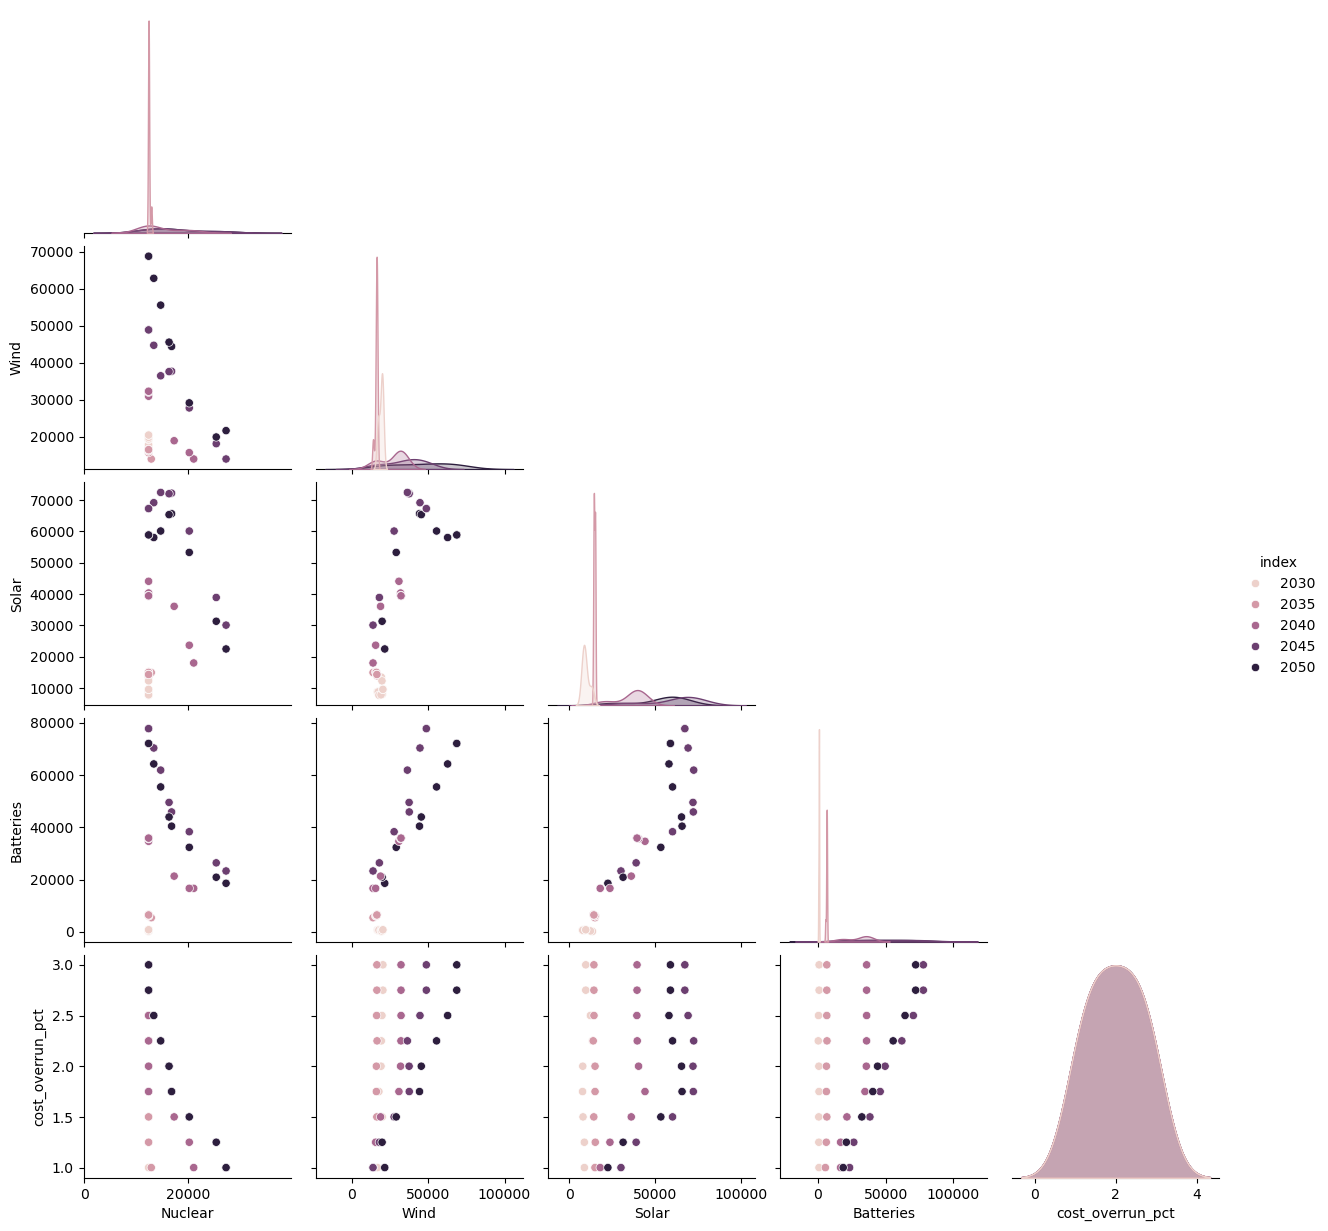

In [62]:
sb.pairplot(all_df.loc[:, ['index','Nuclear','Wind','Solar','Batteries','cost_overrun_pct']], corner=True, hue='index')

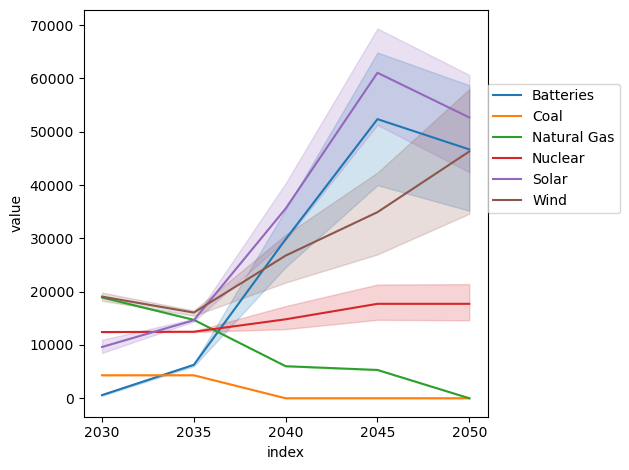

In [63]:
ax = sb.lineplot(data=data, x='index', y='value', hue='carrier')
ax.legend(loc=(1,0.5))
ax.set_xticks(data['index'].unique())
plt.tight_layout()

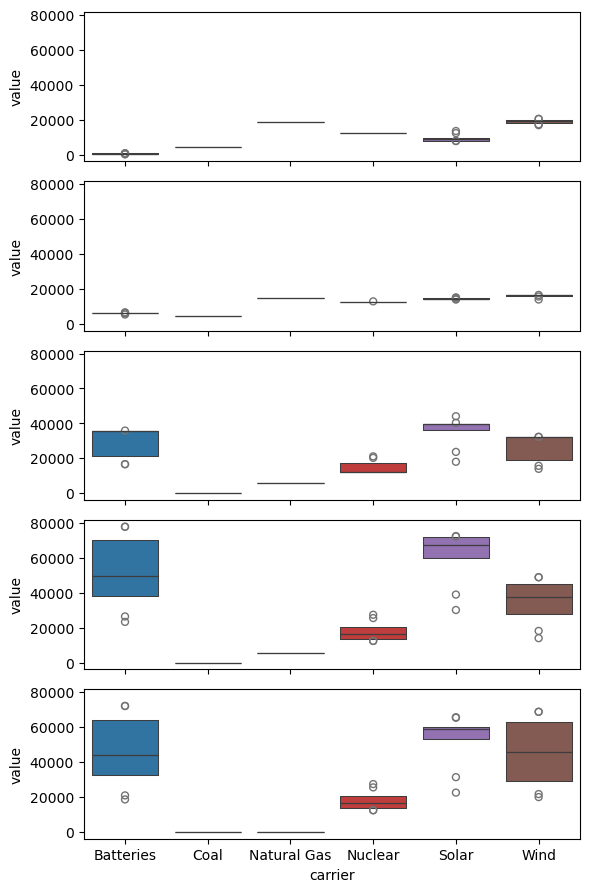

In [66]:
fig, axes = plt.subplots(5, 1, sharex=True, sharey=True, figsize=(6, 9))
for i,year in enumerate(data['index'].unique().tolist()):
    ax = sb.boxenplot(ax=axes[i], data=data.loc[data['index']==year], x='carrier', y='value', hue='carrier')
    # ax.legend(loc=(1,0.5))
    # ax.set_xticks(data['index'].unique())
plt.tight_layout()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


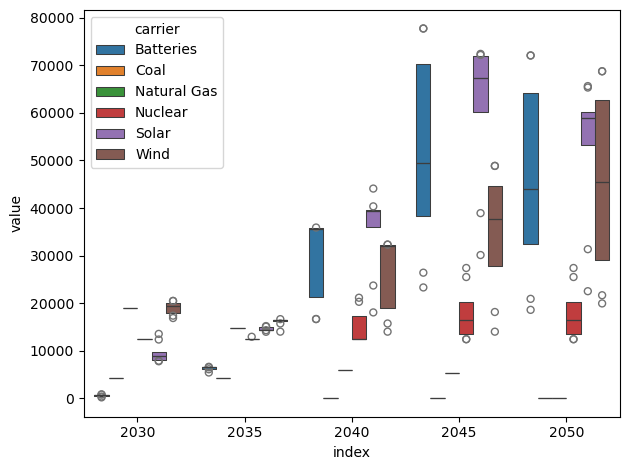

In [67]:
fig, ax = plt.subplots()
sb.boxenplot(ax=ax, data=data, x='index', y='value', hue='carrier')
plt.tight_layout()

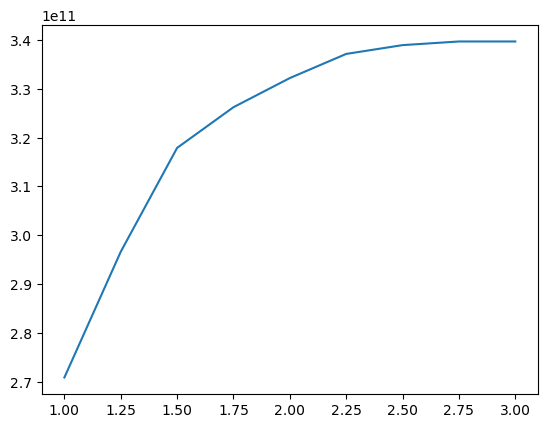

In [68]:
plt.plot(costs, objective_values)

In [90]:
all_df.loc[all_df['cost_overrun_pct']==3]

carrier,index,Batteries,Biomass,Coal,Natural Gas,Nuclear,Petroleum,Solar,Wind,cost_overrun_pct
40,2030,794.724298,0.0,4310.6,18905.2,12415.1,0.0,9630.494029,20461.368251,3.0
41,2035,6467.916574,0.0,4310.6,14709.2,12415.1,0.0,14376.184305,16521.378149,3.0
42,2040,35876.548239,0.0,0.0,6008.2,12415.1,0.0,39461.646684,32299.059466,3.0
43,2045,77762.193437,0.0,0.0,5306.1,12415.1,0.0,67270.036610,48863.198814,3.0
44,2050,72088.701160,0.0,0.0,0.0,12415.1,0.0,58872.142581,68761.563803,3.0


In [72]:
test_network = pypsa.Network("..//results//cost-2023_growth-0.01_demand-1.85E+08_atb-Moderate_v11.0//networks//illinois_solved.nc")

INFO:pypsa.io:Imported network illinois_solved.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units


In [78]:
test_df = get_active_units(test_network).T
test_df = test_df.assign(cost_overrun_pct=10)
test_df

carrier,Batteries,Biomass,Coal,Natural Gas,Nuclear,Petroleum,Solar,Wind,cost_overrun_pct
2030,819.802109,0.0,4310.6,18905.2,12415.1,0.0,8272.847742,18507.730131,10
2035,6389.471056,0.0,4310.6,14709.2,12415.1,0.0,15353.912972,15940.376861,10
2040,36377.661445,0.0,0.0,6008.2,12415.1,0.0,37544.621039,32885.746865,10
2045,77097.440150,0.0,0.0,5306.1,12415.1,0.0,67672.527301,49297.418192,10
2050,71527.471203,0.0,0.0,0.0,12415.1,0.0,60632.279559,69937.784239,10


In [79]:
frames.append(test_df)

In [82]:
all_df = pd.concat(frames, axis=0).reset_index()
data = all_df.melt(id_vars=['cost_overrun_pct', 'index'],
                value_vars=['Batteries','Coal','Natural Gas','Nuclear','Solar','Wind'])

In [80]:
all_results.append(test_network)

In [83]:
cost_overruns = all_df['cost_overrun_pct'].unique().tolist()

In [84]:
objective_values = [r.objective for r in all_results]
objective_values

[270881038618.2253,
 296629646217.05414,
 317888557800.56537,
 326218278807.5214,
 332184472931.70886,
 337127005622.36035,
 338927585709.1731,
 339673856662.4132,
 339673856662.4136,
 473157933522.93774]

In [87]:
test_network.loads_t.p_set.sum().sum()

1017500000.0

In [88]:
all_results[0].loads_t.p_set.sum().sum()

1017500000.0

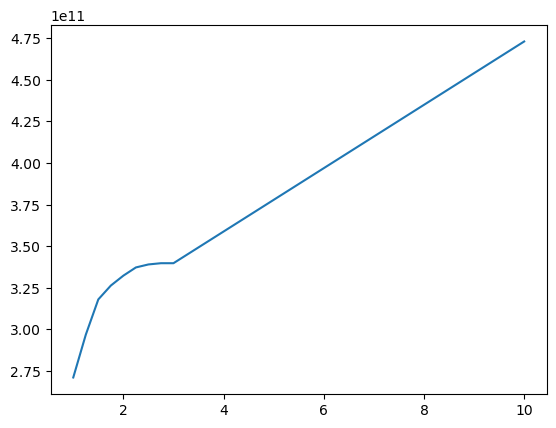

In [85]:
plt.plot(cost_overruns, objective_values)

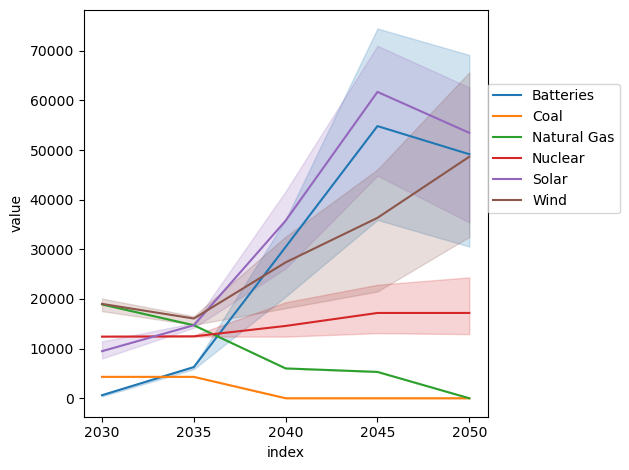

In [93]:
ax = sb.lineplot(data=data, x='index', y='value', hue='carrier', errorbar=('ci', 100))
ax.legend(loc=(1,0.5))
ax.set_xticks(data['index'].unique())
plt.tight_layout()

In [98]:
stats = test_network.statistics.supply()

In [100]:
costs = test_network.statistics.capex()

In [105]:
nuc_costs = costs.loc[('Generator','Nuclear')].sum()

In [106]:
nuc_gen = stats.loc[('Generator','Nuclear')].sum()

In [107]:
nuc_costs/nuc_gen

19.954580101646705

In [108]:
lcoe_list = []
for result in all_results:
    capex = result.statistics.capex()
    gen = result.statistics.supply()
    nuc_costs = capex.loc[('Generator','Nuclear')].sum()
    nuc_gen = gen.loc[('Generator','Nuclear')].sum()
    
    lcoe_list.append(nuc_costs/nuc_gen)

In [109]:
lcoe_list

[59.764979167428415,
 66.80313894382988,
 58.45615302847978,
 40.39330504558677,
 40.80264782076617,
 33.87859976791964,
 26.61835041081483,
 19.97726149544151,
 19.97726149544151,
 19.954580101646705]